# Dataset 5

## https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataframes/dataset5.csv')
data.head()

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2                     1.5643                     2.3308   
3                     3.7805                     3.5664   
4                     6.1727                     5.8416   

   tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                     3.8686                     4.2105   
1                    23.5155                    14.1962   
2                     9.4959                    10.7458   
3                     5.2558                    14.0403   
4                     6.0805                     5.7621   

   tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                     5.1221                     4.4625   
1                    11.0261                     9.5082   
2                    11.0177                     4.8066   
3                     4.2235                     4.6857   
4                     7.7817                    11.6891   

   tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                     2.6202                     3.0004   
1                     6.5245                     6.3431   
2                     2.9199                     3.1495   
3                     4.8460                     6.2650   
4                     8.2103                     5.0559   

   tqwt_kurtosisValue_dec_36  class  
0                    18.9405      1  
1                    45.1780      1  
2                     4.7666      1  
3                     4.0603      1  
4                     6.1164      1  

[5 rows x 755 columns]

In [3]:
data.shape

(756, 755)

[]

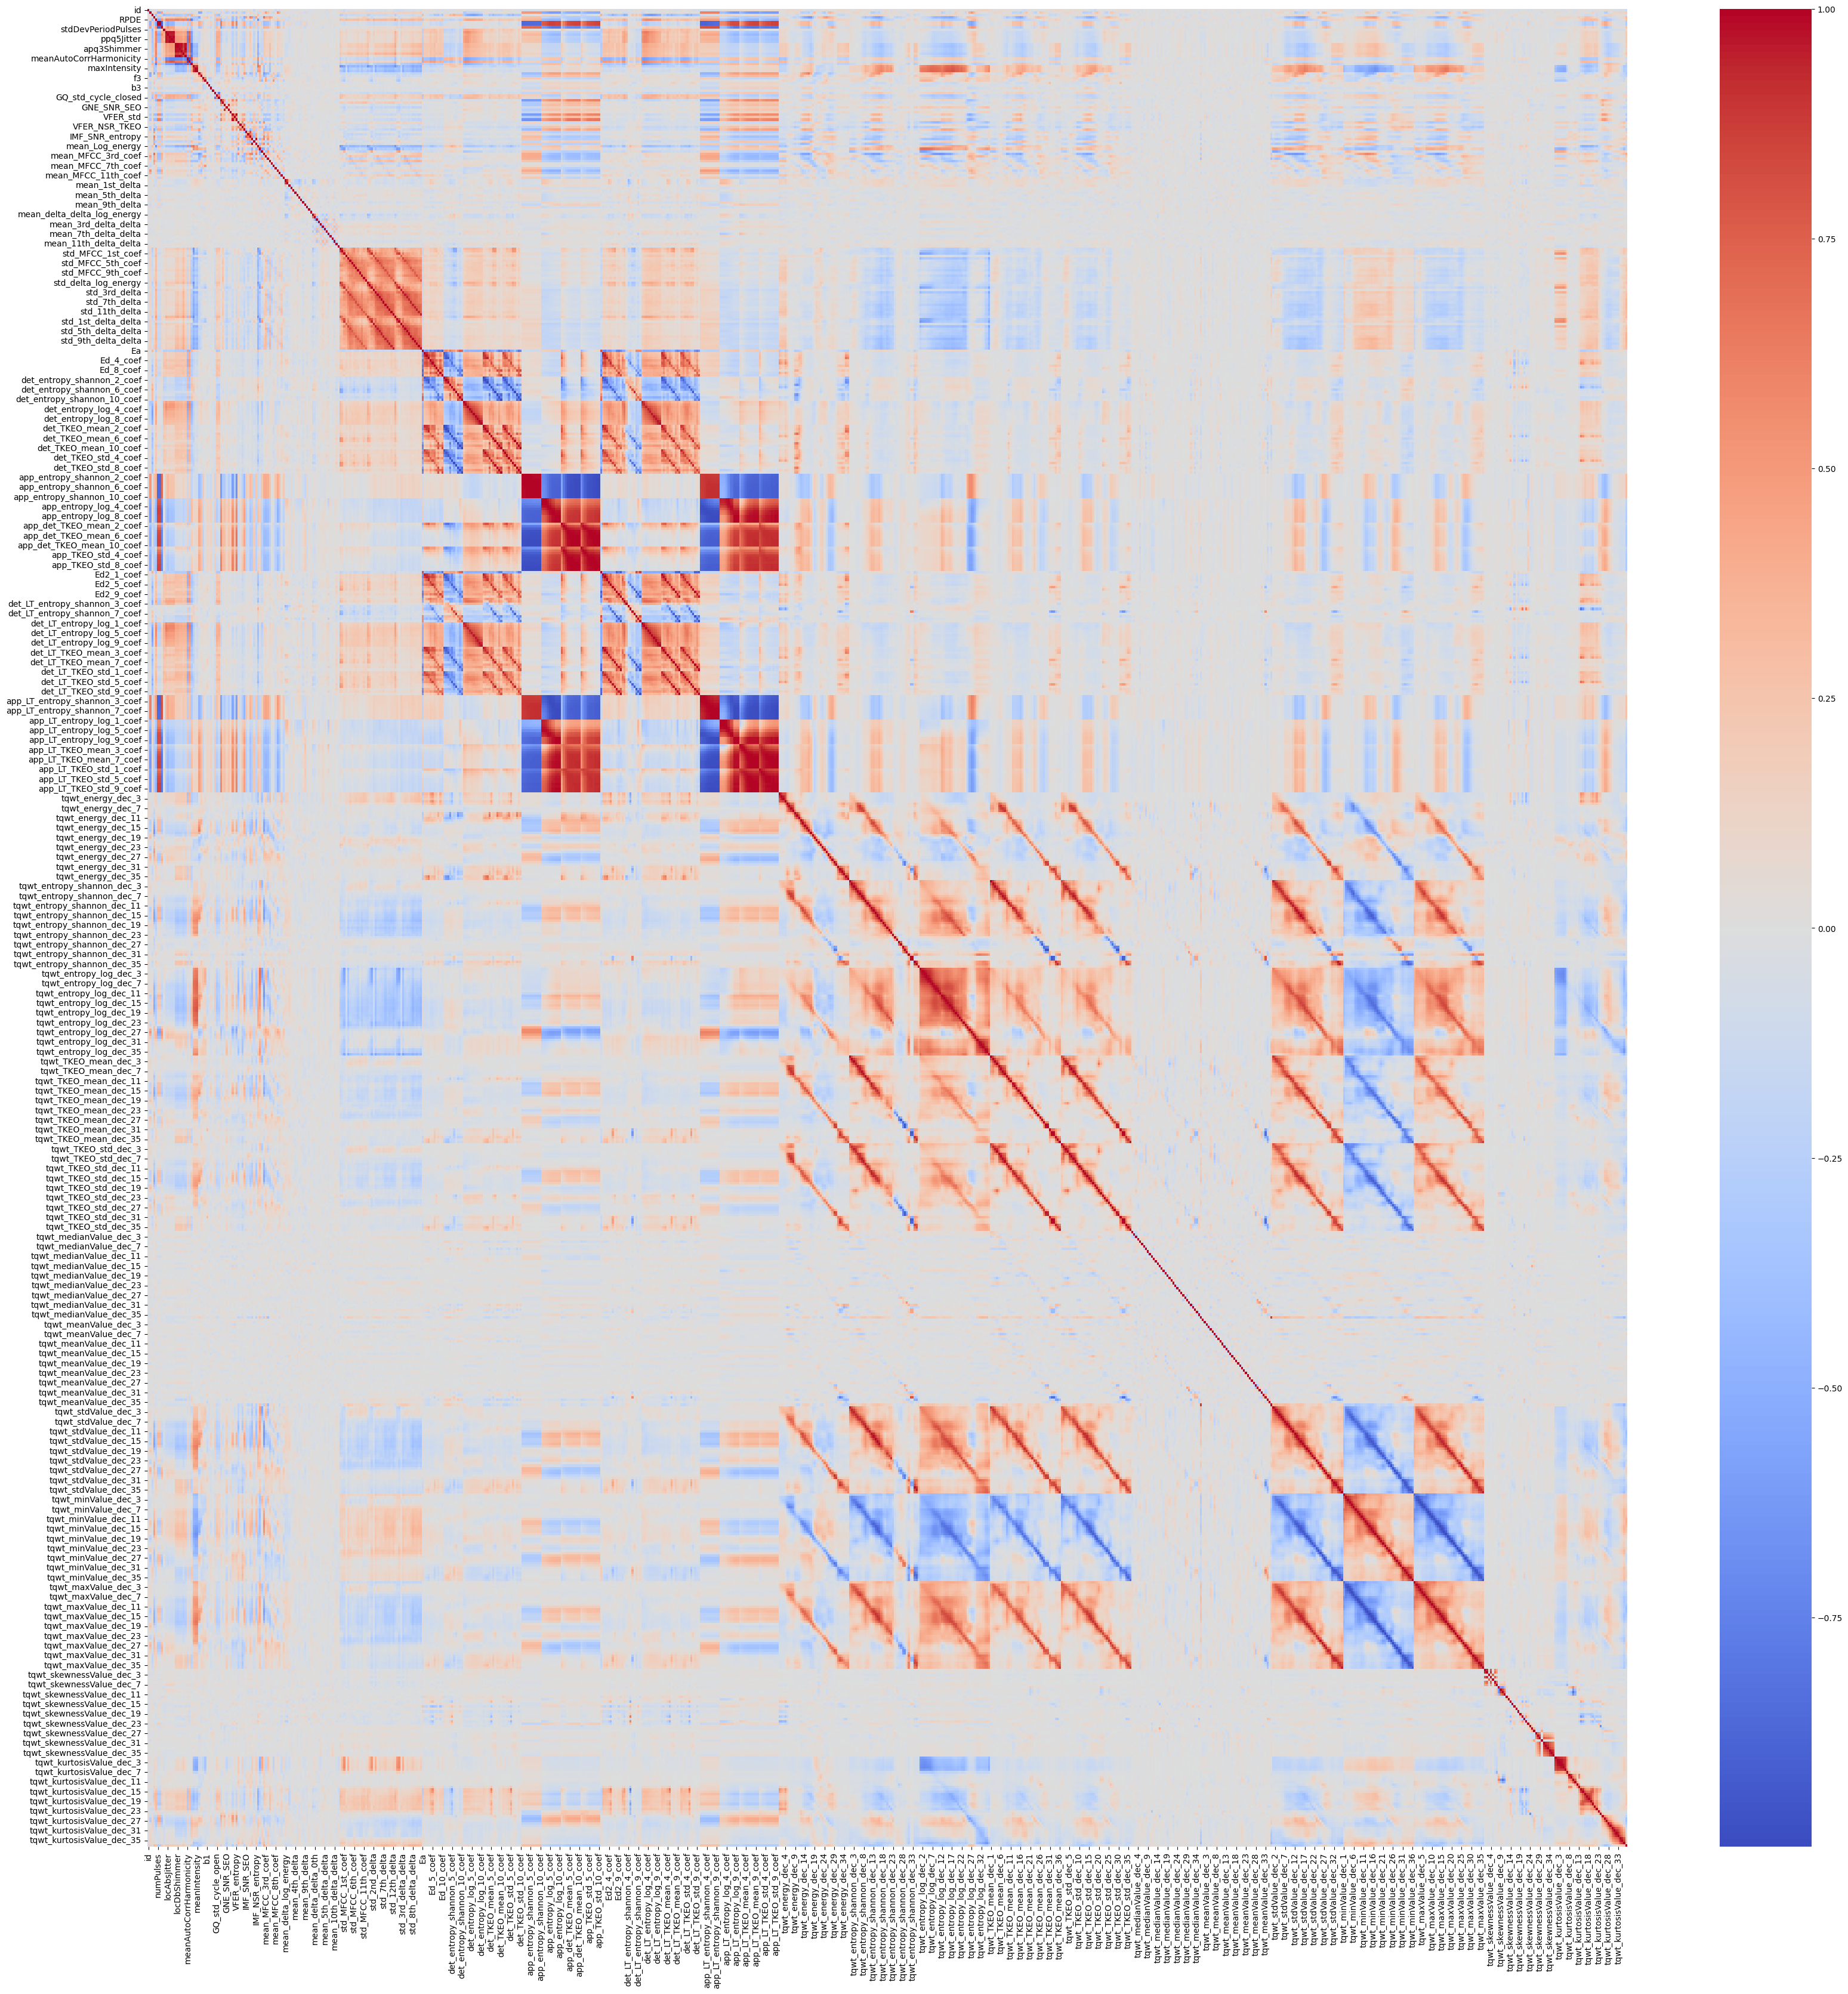

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize=(40, 40))

sns.heatmap(corr_matrix, cmap = 'coolwarm')
plt.plot()

## XGBoost

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data5 = data.copy()
data5 = data5.drop(['id'], axis = 1)

In [6]:
X = data5.drop(['class'], axis = 1)
y = data5['class']

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred1 = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.84


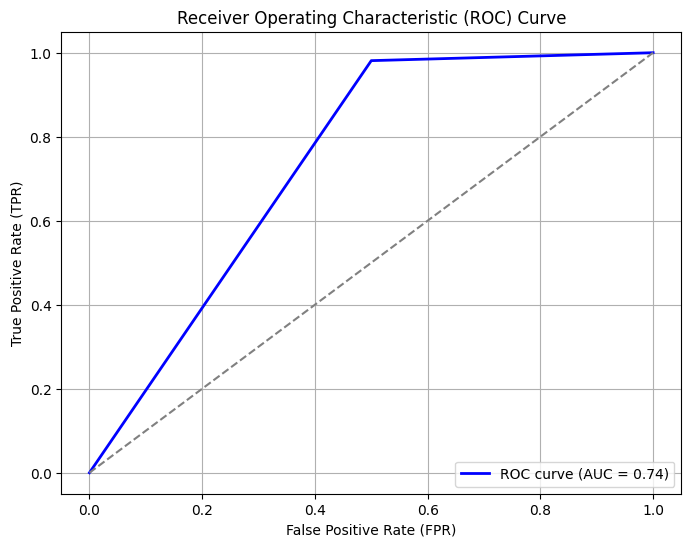

In [7]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


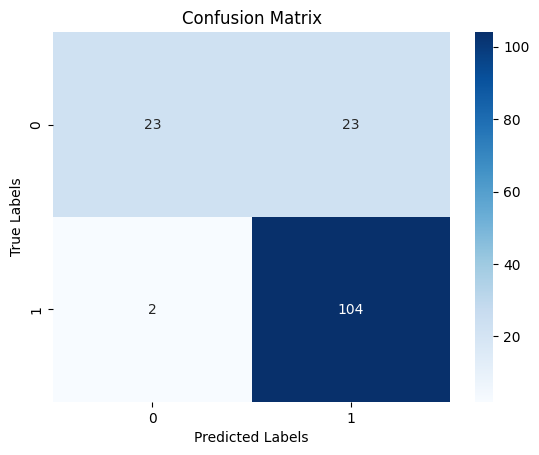

Confusion Matrix:
 [[ 23  23]
 [  2 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.50      0.65        46
           1       0.82      0.98      0.89       106

    accuracy                           0.84       152
   macro avg       0.87      0.74      0.77       152
weighted avg       0.85      0.84      0.82       152



In [8]:
conf_matrix = confusion_matrix(y_test1, y_pred1)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)

<Figure size 3000x3000 with 0 Axes>

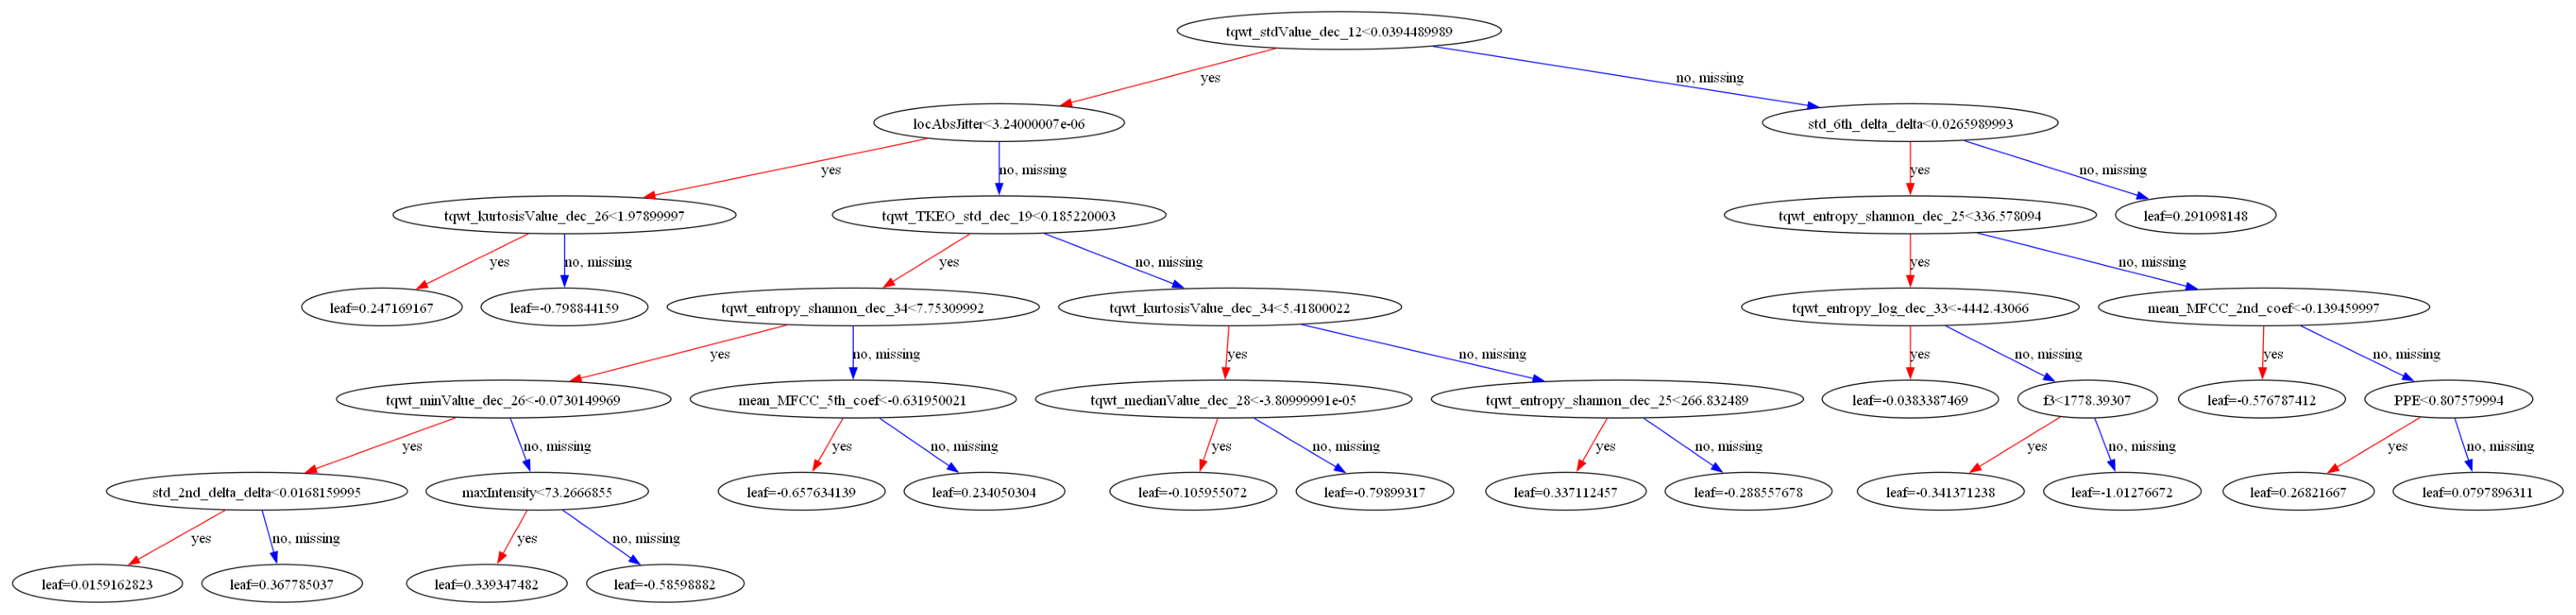

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(30, 30))
xgb.plot_tree(XGB_classifier)

fig = plt.gcf()
fig.set_size_inches(40, 40)

plt.show()

## Support Vector Machine

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
data5 = data.copy()
data5 = data5.drop(['id'], axis = 1)

### Linear

In [11]:
# X = data5.drop(['class'], axis = 1)
# y = data5['class']

# X_train, X_test, y_train, y_test21 = train_test_split(X, y, test_size = 0.2, random_state = 45)

# SVM_classifier = SVC(random_state=45, kernel = 'linear')

# SVM_classifier.fit(X_train, y_train)

# y_pred21 = SVM_classifier.predict(X_test)

# accuracy = accuracy_score(y_test21, y_pred21)
# print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


In [12]:
# fpr, tpr, thresholds = roc_curve(y_test21, y_pred21)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()


In [13]:
# conf_matrix = confusion_matrix(y_test21, y_pred21)


# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

# # Print the confusion matrix
# print("Confusion Matrix:\n", conf_matrix)

# # Print the classification report
# class_report = classification_report(y_test21, y_pred21)
# print("Classification Report:\n", class_report)

### Polynomial

In [14]:
X = data5.drop(['class'], axis = 1)
y = data5['class']
X_train, X_test, y_train, y_test22 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred22 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test22, y_pred22)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.68


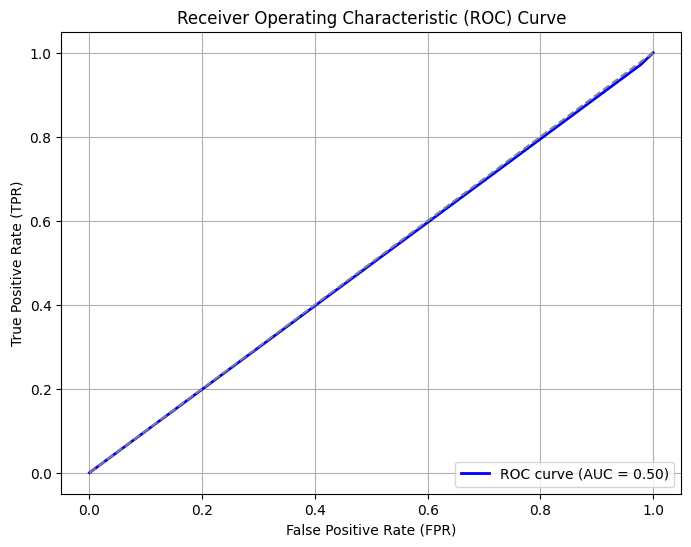

In [15]:
fpr, tpr, thresholds = roc_curve(y_test22, y_pred22)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


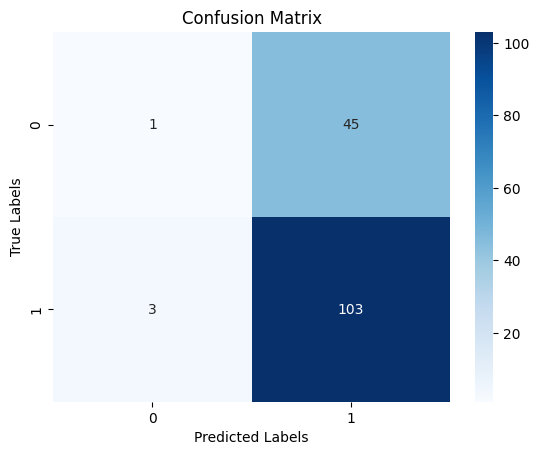

Confusion Matrix:
 [[  1  45]
 [  3 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.02      0.04        46
           1       0.70      0.97      0.81       106

    accuracy                           0.68       152
   macro avg       0.47      0.50      0.43       152
weighted avg       0.56      0.68      0.58       152



In [16]:
conf_matrix = confusion_matrix(y_test22, y_pred22)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test22, y_pred22)
print("Classification Report:\n", class_report)

### Radial Basis Function

In [17]:
X = data5.drop(['class'], axis = 1)
y = data5['class']
X_train, X_test, y_train, y_test23 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred23 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test23, y_pred23)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.71


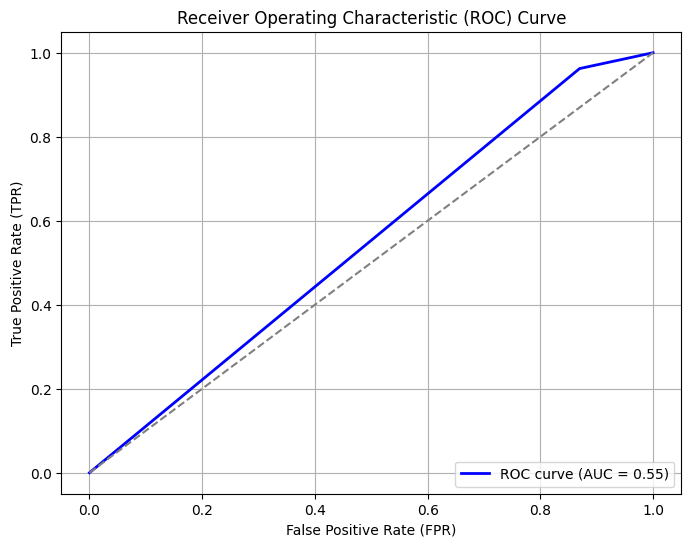

In [18]:
fpr, tpr, thresholds = roc_curve(y_test23, y_pred23)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

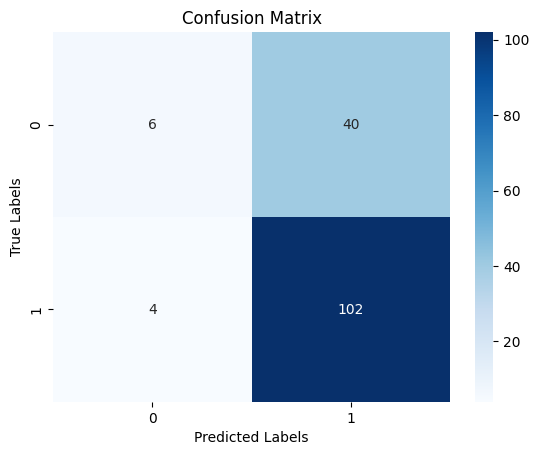

Confusion Matrix:
 [[  6  40]
 [  4 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.13      0.21        46
           1       0.72      0.96      0.82       106

    accuracy                           0.71       152
   macro avg       0.66      0.55      0.52       152
weighted avg       0.68      0.71      0.64       152



In [19]:
conf_matrix = confusion_matrix(y_test23, y_pred23)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test23, y_pred23)
print("Classification Report:\n", class_report)

### Sigmoid Kernel

In [20]:
X = data5.drop(['class'], axis = 1)
y = data5['class']
X_train, X_test, y_train, y_test24 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred24 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test24, y_pred24)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.70


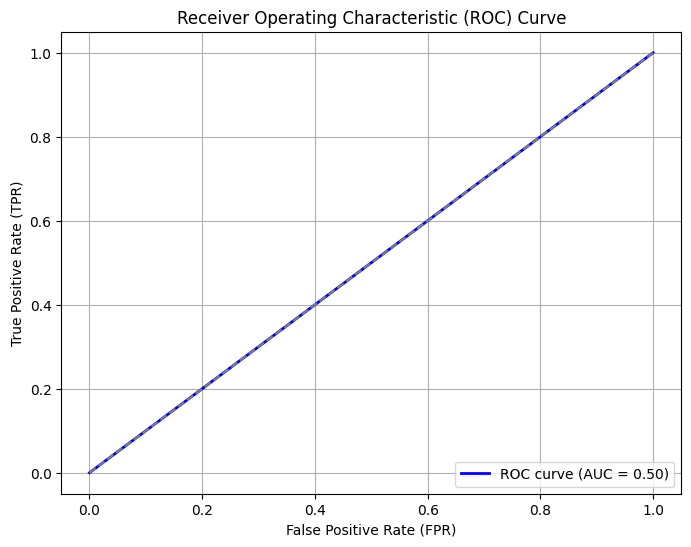

In [21]:
fpr, tpr, thresholds = roc_curve(y_test24, y_pred24)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


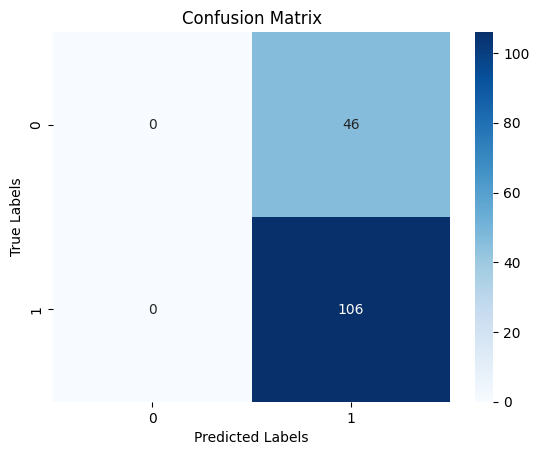

Confusion Matrix:
 [[  0  46]
 [  0 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.70      1.00      0.82       106

    accuracy                           0.70       152
   macro avg       0.35      0.50      0.41       152
weighted avg       0.49      0.70      0.57       152



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
conf_matrix = confusion_matrix(y_test24, y_pred24)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test24, y_pred24)
print("Classification Report:\n", class_report)

## Random Forest

In [23]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
data5 = data.copy()
data5 = data5.drop(['id'], axis = 1)

### GINI Index

In [25]:
X = data5.drop(['class'], axis = 1)
y = data5['class']
X_train, X_test, y_train, y_test31 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='gini', max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred31 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test31, y_pred31)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.76


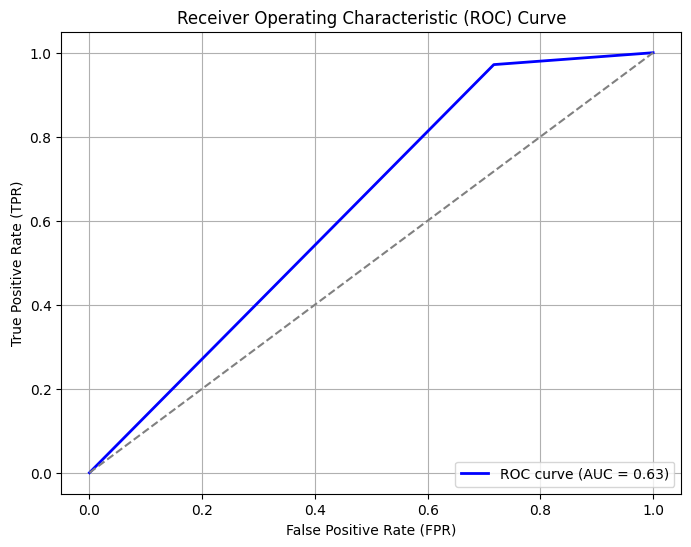

In [26]:
fpr, tpr, thresholds = roc_curve(y_test31, y_pred31)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


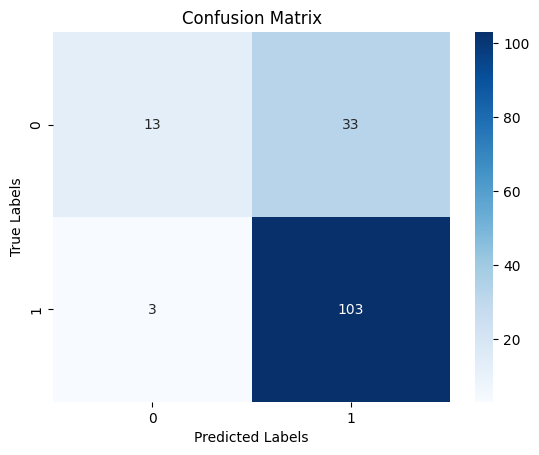

Confusion Matrix:
 [[ 13  33]
 [  3 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.28      0.42        46
           1       0.76      0.97      0.85       106

    accuracy                           0.76       152
   macro avg       0.78      0.63      0.64       152
weighted avg       0.77      0.76      0.72       152



In [27]:
conf_matrix = confusion_matrix(y_test31, y_pred31)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test31, y_pred31)
print("Classification Report:\n", class_report)

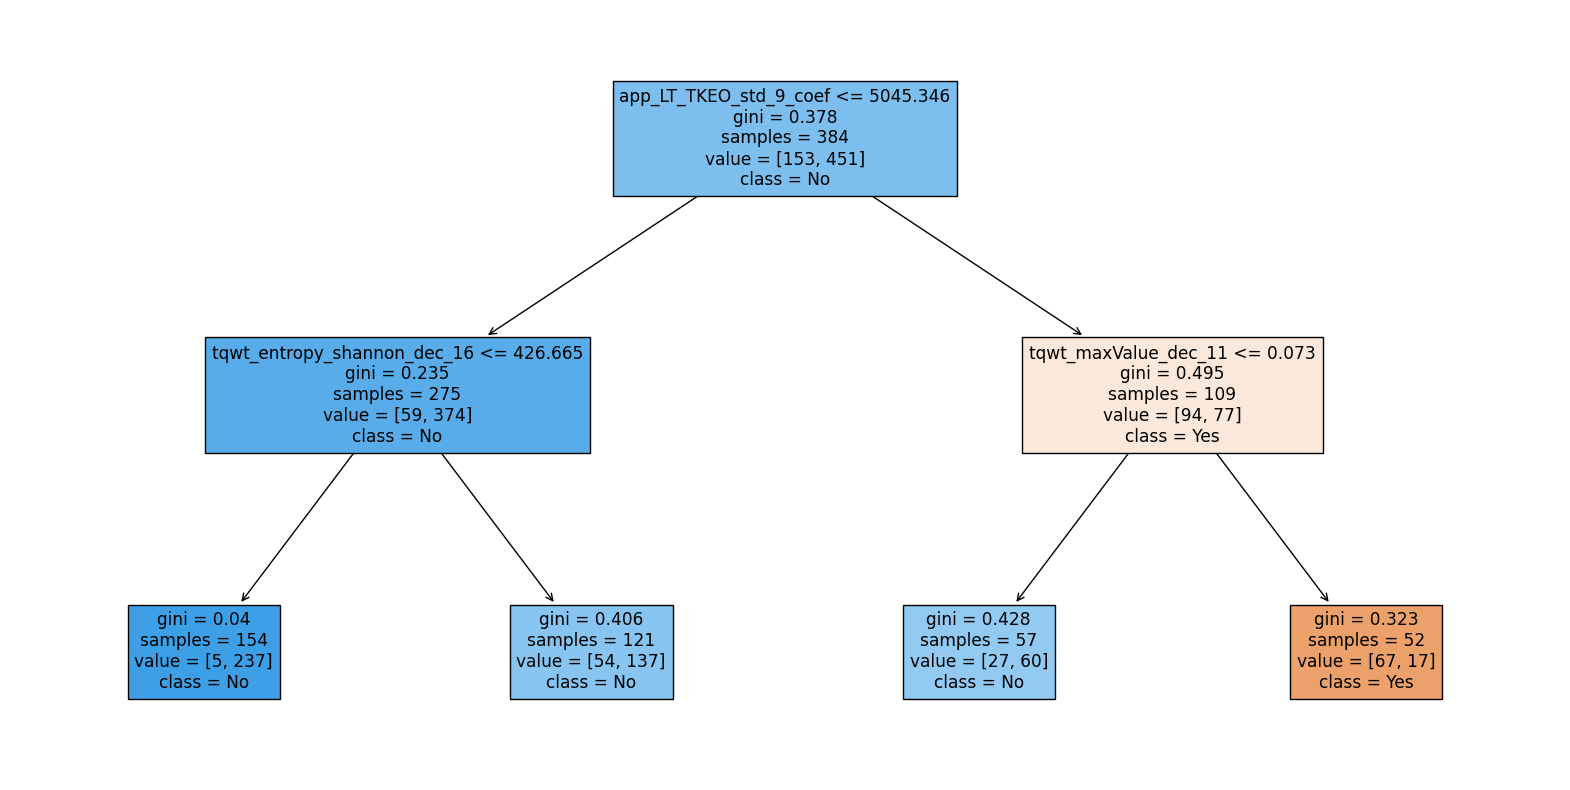

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data5.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

### Entropy

In [29]:
X = data5.drop(['class'], axis = 1)
y = data5['class']
X_train, X_test, y_train, y_test32 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='entropy' , max_depth = 2)

RF_Classifier.fit(X_train, y_train)

y_pred32 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test32, y_pred32)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.76


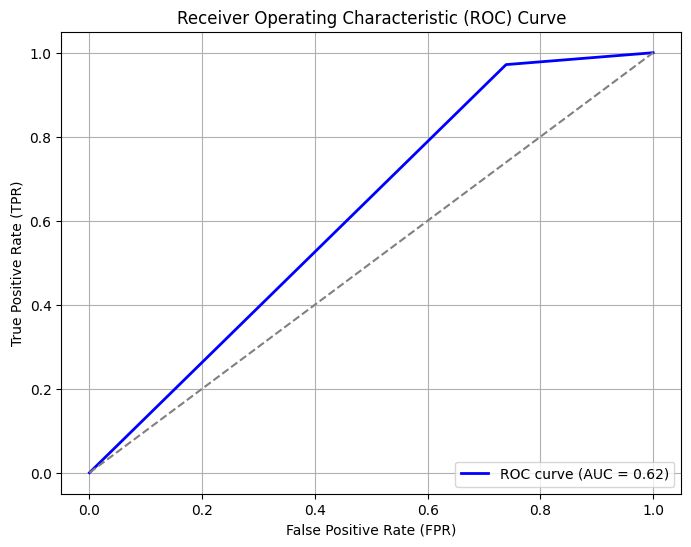

In [30]:
fpr, tpr, thresholds = roc_curve(y_test32, y_pred32)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


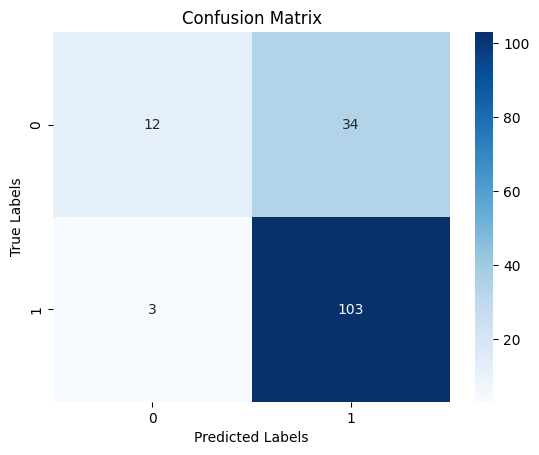

Confusion Matrix:
 [[ 12  34]
 [  3 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.26      0.39        46
           1       0.75      0.97      0.85       106

    accuracy                           0.76       152
   macro avg       0.78      0.62      0.62       152
weighted avg       0.77      0.76      0.71       152



In [31]:
conf_matrix = confusion_matrix(y_test32, y_pred32)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test32, y_pred32)
print("Classification Report:\n", class_report)

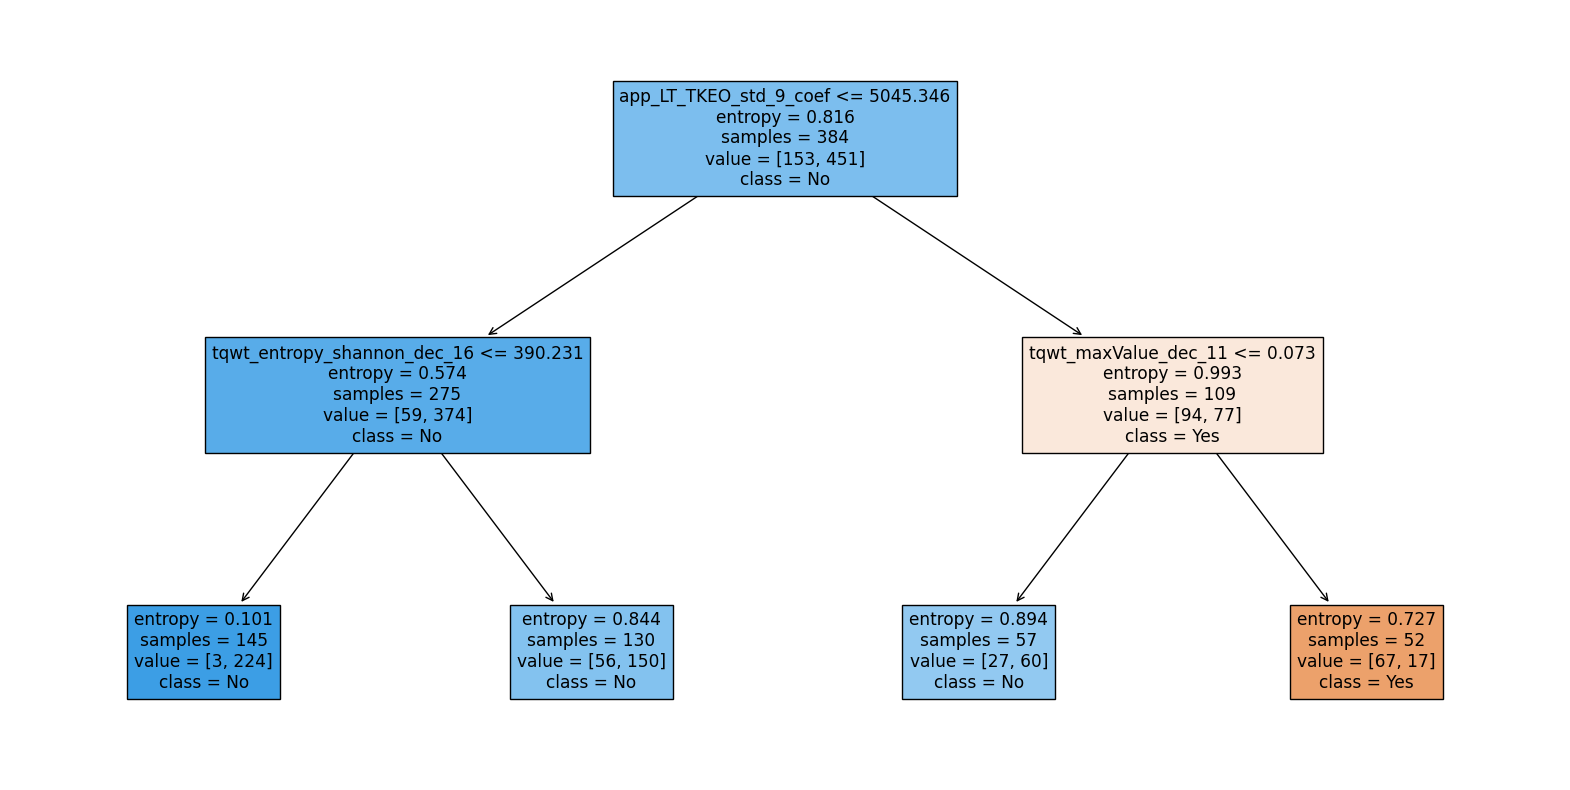

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data5.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

## Naive Bayes

In [33]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
data5 = data.copy()
data5 = data5.drop(['id'], axis = 1)

In [35]:
X = data5.drop(['class'], axis = 1)
y = data5['class']

scaler = StandardScaler()

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred4 = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.67


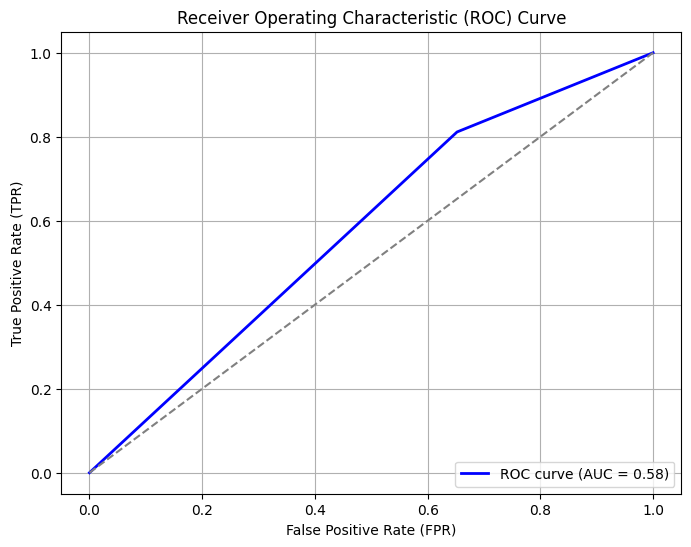

In [36]:
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


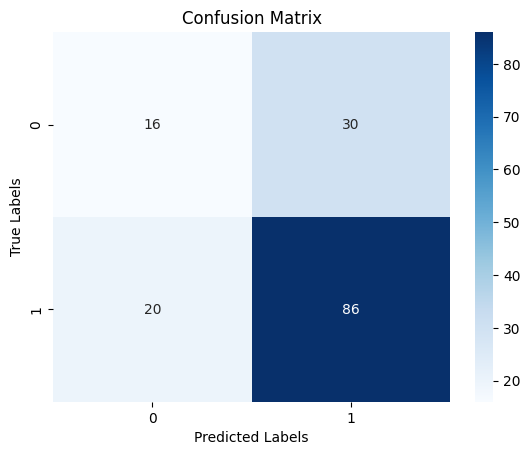

Confusion Matrix:
 [[16 30]
 [20 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.35      0.39        46
           1       0.74      0.81      0.77       106

    accuracy                           0.67       152
   macro avg       0.59      0.58      0.58       152
weighted avg       0.65      0.67      0.66       152



In [37]:
conf_matrix = confusion_matrix(y_test4, y_pred4)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test4, y_pred4)
print("Classification Report:\n", class_report)

## KNN

In [38]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
data5 = data.copy()
data5 = data5.drop(['id'], axis = 1)

In [40]:
X = data5.drop(['class'], axis = 1)
y = data5['class']

scaler = StandardScaler()

X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred5 = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test5, y_pred5)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.87


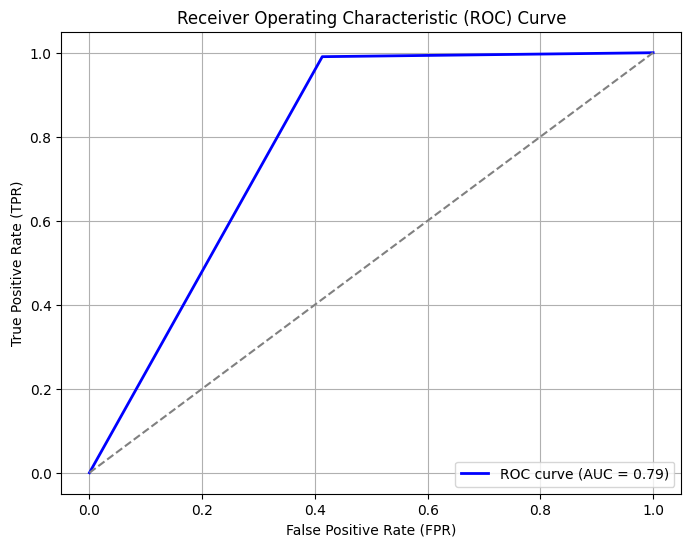

In [41]:
fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


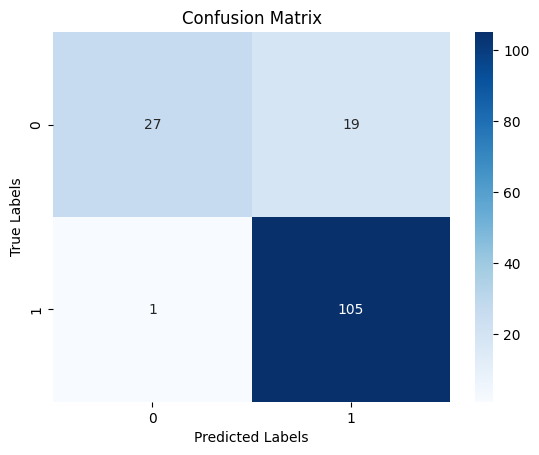

Confusion Matrix:
 [[ 27  19]
 [  1 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73        46
           1       0.85      0.99      0.91       106

    accuracy                           0.87       152
   macro avg       0.91      0.79      0.82       152
weighted avg       0.88      0.87      0.86       152



In [42]:
conf_matrix = confusion_matrix(y_test5, y_pred5)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test5, y_pred5)
print("Classification Report:\n", class_report)

# Combined analaysis

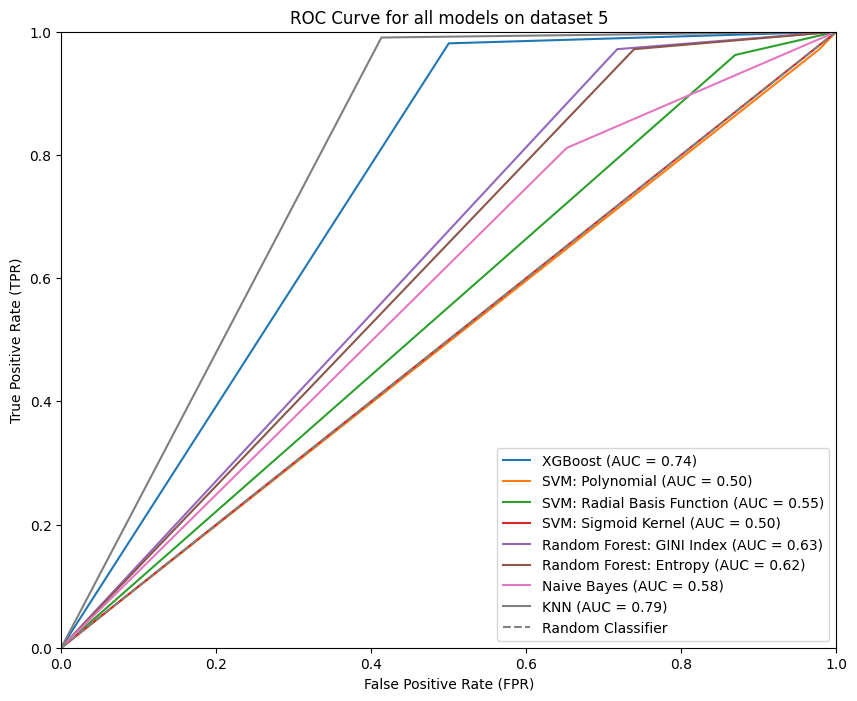

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# fpr21, tpr21, _ = roc_curve(y_test21, y_pred21)
# roc_auc21 = auc(fpr21, tpr21)

fpr22, tpr22, _ = roc_curve(y_test22, y_pred22)
roc_auc22 = auc(fpr22, tpr22)

fpr23, tpr23, _ = roc_curve(y_test23, y_pred23)
roc_auc23 = auc(fpr23, tpr23)

fpr24, tpr24, _ = roc_curve(y_test24, y_pred24)
roc_auc24 = auc(fpr24, tpr24)

fpr31, tpr31, _ = roc_curve(y_test31, y_pred31)
roc_auc31 = auc(fpr31, tpr31)

fpr32, tpr32, _ = roc_curve(y_test32, y_pred32)
roc_auc32 = auc(fpr32, tpr32)

fpr4, tpr4, _ = roc_curve(y_test4, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test5, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'XGBoost (AUC = {roc_auc1:.2f})')
# plt.plot(fpr21, tpr21, label=f'SVM: Linear Kernel (AUC = {roc_auc21:.2f})')
plt.plot(fpr22, tpr22, label=f'SVM: Polynomial (AUC = {roc_auc22:.2f})')
plt.plot(fpr23, tpr23, label=f'SVM: Radial Basis Function (AUC = {roc_auc23:.2f})')
plt.plot(fpr24, tpr24, label=f'SVM: Sigmoid Kernel (AUC = {roc_auc24:.2f})')
plt.plot(fpr31, tpr31, label=f'Random Forest: GINI Index (AUC = {roc_auc31:.2f})')
plt.plot(fpr32, tpr32, label=f'Random Forest: Entropy (AUC = {roc_auc32:.2f})')
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'KNN (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for all models on dataset 5')
plt.legend(loc='lower right')
plt.show()